In [33]:
from pandas import pandas as pd
from tf_keras.preprocessing.text import Tokenizer
import pickle

data_train = pd.read_json("dataset-jamo-train.json")
X_train = data_train["message"]
Y_train = data_train["type"]

with open("tokenizer-jamo.pickle", 'rb') as handle:
        tokenizer = pickle.load(handle)
X_train = tokenizer.texts_to_sequences(X_train)

vocab_size = 124

최대 길이 : 4673
평균 길이 : 437.770688201624


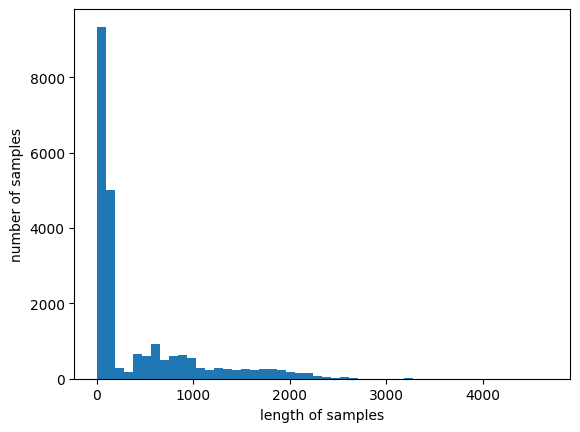

In [34]:
from matplotlib import pyplot as plt

print('최대 길이 :',max(len(review) for review in X_train))
print('평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


In [35]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [36]:
max_len = 800
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 800 이하인 샘플의 비율: 79.07441096862937


In [37]:
from tf_keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen=max_len)

In [38]:
from tf_keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout, MaxPooling1D
from tf_keras.models import Sequential
from tf_keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 16
dropout_ratio = 0.3
num_filters = 128
kernel_size = 60

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('cnn-jamo.keras', monitor = 'val_acc', mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[es, mc])


Epoch 1/20
282/282 [==============================] - ETA: 0s - loss: 0.3439 - acc: 0.8502
Epoch 1: val_acc improved from -inf to 0.95253, saving model to cnn-jamo.keras
282/282 [==============================] - 87s 307ms/step - loss: 0.3439 - acc: 0.8502 - val_loss: 0.1433 - val_acc: 0.9525
Epoch 2/20
282/282 [==============================] - ETA: 0s - loss: 0.1250 - acc: 0.9598
Epoch 2: val_acc improved from 0.95253 to 0.97183, saving model to cnn-jamo.keras
282/282 [==============================] - 129s 459ms/step - loss: 0.1250 - acc: 0.9598 - val_loss: 0.0905 - val_acc: 0.9718
Epoch 3/20
282/282 [==============================] - ETA: 0s - loss: 0.0899 - acc: 0.9717
Epoch 3: val_acc improved from 0.97183 to 0.97626, saving model to cnn-jamo.keras
282/282 [==============================] - 101s 358ms/step - loss: 0.0899 - acc: 0.9717 - val_loss: 0.0817 - val_acc: 0.9763
Epoch 4/20
282/282 [==============================] - ETA: 0s - loss: 0.0739 - acc: 0.9769
Epoch 4: val_acc im

In [39]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))

# layer 1
model.add(Conv1D(filters=64, kernel_size=3, padding='valid', activation='relu'))
model.add(Dropout(0.5)) # 일부 자모 조합에 너무 민감히 반응함

# layer 2
model.add(Conv1D(filters=128, kernel_size=5, padding='valid', activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('cnn-jamo-deep.keras', monitor = 'val_acc', mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[es, mc])

Epoch 1/20
282/282 [==============================] - ETA: 0s - loss: 0.4052 - acc: 0.8099
Epoch 1: val_acc improved from -inf to 0.78061, saving model to cnn-jamo-deep.keras
282/282 [==============================] - 36s 127ms/step - loss: 0.4052 - acc: 0.8099 - val_loss: 0.4149 - val_acc: 0.7806
Epoch 2/20
282/282 [==============================] - ETA: 0s - loss: 0.2464 - acc: 0.8984
Epoch 2: val_acc improved from 0.78061 to 0.90750, saving model to cnn-jamo-deep.keras
282/282 [==============================] - 38s 133ms/step - loss: 0.2464 - acc: 0.8984 - val_loss: 0.1994 - val_acc: 0.9075
Epoch 3/20
282/282 [==============================] - ETA: 0s - loss: 0.1101 - acc: 0.9633
Epoch 3: val_acc improved from 0.90750 to 0.92258, saving model to cnn-jamo-deep.keras
282/282 [==============================] - 38s 134ms/step - loss: 0.1101 - acc: 0.9633 - val_loss: 0.1691 - val_acc: 0.9226
Epoch 4/20
282/282 [==============================] - ETA: 0s - loss: 0.0874 - acc: 0.9736
Epoch 